In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing
from sklearn.tree import DecisionTreeClassifier

## Predspracovanie datasetov

Na predspracovanie oboch datasetov bolo nutné premiestniť všetky potrebné funkcie a triedy, vytvorené v predchádzajúcej
fáze projektu do novovytvoreného súboru preprocessing.py. V danom súbore sme vytvorili funkciu, ktorá ako argument berie
.csv súbory pre osobné a aj medicínske dáta, spojí ich do jedného datasetu, ktorý následne upraví pomocou našej
pipeline. Po predspracovaní nám vráti upravený dataset, s ktorým už môžeme ďalej pracovať. Túto funkciu zavoláme pre
trénovací, ako aj validačný dataset.

Ako môžeme nižšie vidieť, proces predspracovania prebehol správne, oba datasety obsahujú rovnaké atribúty, majú všade
len jeden dátový typ a sú bez akýchkoľvek chýbajúcich hodnôt.

In [2]:
medical_train = pd.read_csv("dataset/other_train.csv")
personal_train = pd.read_csv("dataset/personal_train.csv")

train_data = preprocessing.preprocess_dataset(medical_train, personal_train, 1)
train_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3924 non-null   float64
 1   sex                3924 non-null   float64
 2   kurtosis_oxygen    3924 non-null   float64
 3   pregnant           3924 non-null   float64
 4   education-num      3924 non-null   float64
 5   skewness_glucose   3924 non-null   float64
 6   mean_glucose       3924 non-null   float64
 7   std_oxygen         3924 non-null   float64
 8   capital-gain       3924 non-null   float64
 9   skewness_oxygen    3924 non-null   float64
 10  kurtosis_glucose   3924 non-null   float64
 11  final_weight       3924 non-null   float64
 12  diabetes_presence  3924 non-null   fl

d:\programming\python\iau_projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Programming\Python\IAU_projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Programming\Python\IAU_projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [3]:
medical_valid = pd.read_csv("dataset/other_valid.csv")
personal_valid = pd.read_csv("dataset/personal_valid.csv")

valid_data = preprocessing.preprocess_dataset(medical_valid, personal_valid, 1)
valid_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1306 non-null   float64
 1   sex                1306 non-null   float64
 2   kurtosis_oxygen    1306 non-null   float64
 3   pregnant           1306 non-null   float64
 4   education-num      1306 non-null   float64
 5   skewness_glucose   1306 non-null   float64
 6   mean_glucose       1306 non-null   float64
 7   std_oxygen         1306 non-null   float64
 8   capital-gain       1306 non-null   float64
 9   skewness_oxygen    1306 non-null   float64
 10  kurtosis_glucose   1306 non-null   float64
 11  final_weight       1306 non-null   float64
 12  diabetes_presence  1306 non-null   fl

d:\programming\python\iau_projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Programming\Python\IAU_projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Programming\Python\IAU_projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

## Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

### Pozorovanie závislostí v dátach

Predtým ako vytvoríme rozhodovací strom, musíme najprv určiť, aké atribúty pri výbere pravidiel použijeme. Taktiež bude
nutné určiť akú hodnotu by mali mať. Pomocou nej budeme dáta v strome rozdeľovať. Túto hodnotu môžeme predpokladať
pomocou grafov, ktoré môžeme vidieť nižšie. Ako prvé máme zobrazené boxploty pre vybrané atribúty (zamerali sme sa na
hlavne na tie, ktoré korelovali s atribútom diabetes_presence), kde môžeme vidieť pri akej hodnote začne prevládať počet
chorých pacientov. Rovnakým spôsobom slúžia aj zobrazenia distribúcií jednotlivých atribútov.

Ako prvý sme použili atribút skewness_oxygen. V oboch grafoch môžeme vidieť, že počet chorých s klesajúcou hodnotou atribútu
narastá. Chorí začnú prevládať okolo hodnoty -0.75 a práve túto hodnotu použijeme aj v našich pravidlách. Pacienti s nižšou
hodnotou pôjdú do ľavej vetvy stromu, pacienti s vyššou do pravej.

V ľavej vetve je ako ďalší použitý atribút skewness_glucose. Pri hodnote 0 až -0.2 začne počet chorých pacientov klesať,
zatiaľ čo zdraví narastajú. Vybrali sme si hodnotu -0.2. Pacienti u ktorých bola táto hodnota väčia sa presunuli do ľavej
vetvy  a tí, ktorí nesplnili podmienky pravidla, boli označení za zdravých.

V poslednom pravidle ľavej vetvy sme využili atribút kurtosis_glucose. Vidíme, že stredná hranica medzi počtom chorých a
zdravých sa nachádza niekde v intervale od 0.5 približne po 0.75. Nakoniec sme vybrali hodnotu 0.6. Ak bola väčšia, pacient
bude označený za chorého, zatiaľ čo ostatných označíme za zdravých.

V pravej vetve najprv rozdeľujeme podľa dvoch atribútov, skewness_glucose a kurtosis_glucose. Ak je hodnota oboch atribútov
väčšia ako 0.7, pacienta budeme považovať za chorého, keďže v týchto hodnotách sa vyskytuje väčší počet ľudí s prítomnosťou
ochorenia. Ostatné dáta rozdeľujeme dalej, podľa atribútu mean_glucose. Tu sme vybrali hodnotu -0.95, kde menšie číslo
indikovalo prítomnosť choroby a väčšie naopak. Rovnakým spôsobom sme vytvorili aj druhý zoznam pravidiel. Nižšie budeme môcť
vidieť vyhodnotenie oboch zoznamov a ich porovnanie.

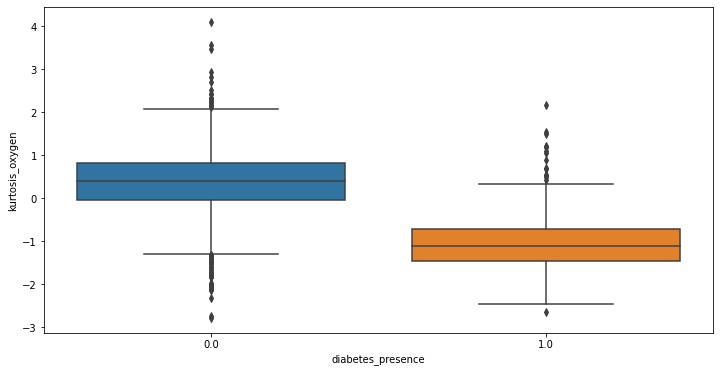

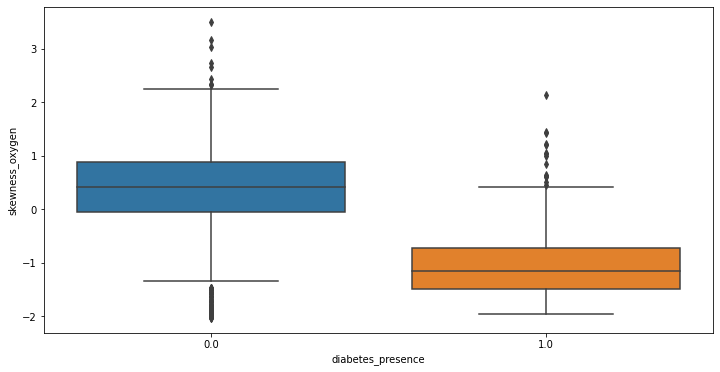

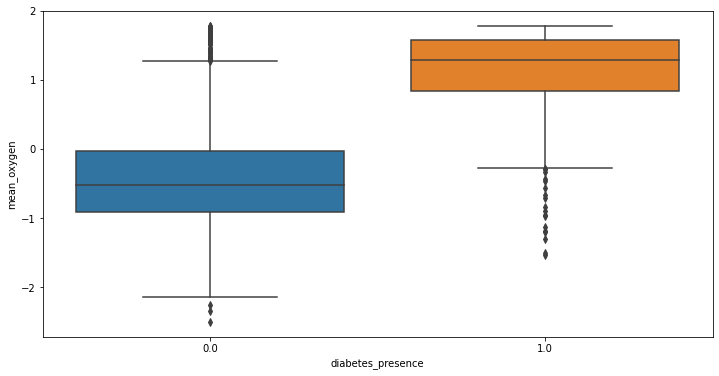

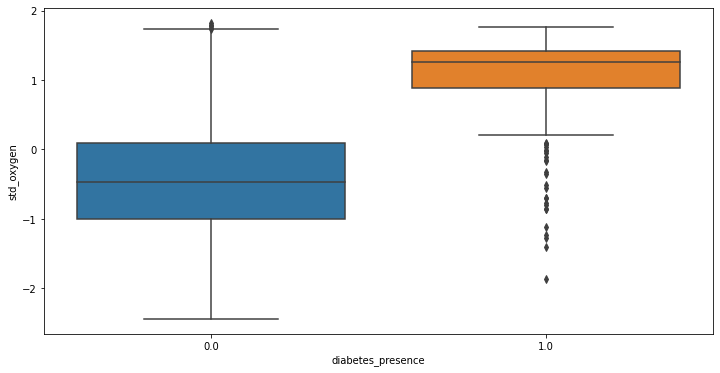

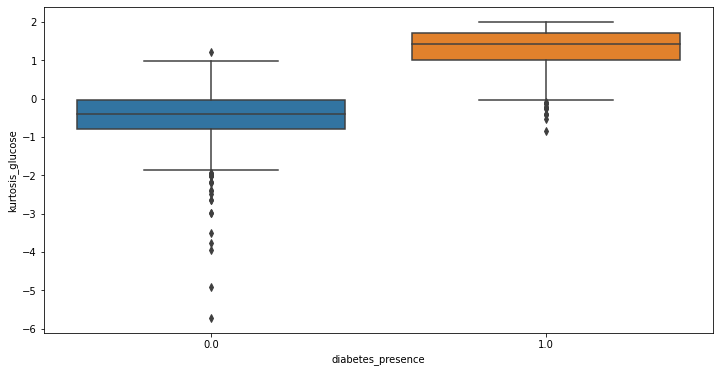

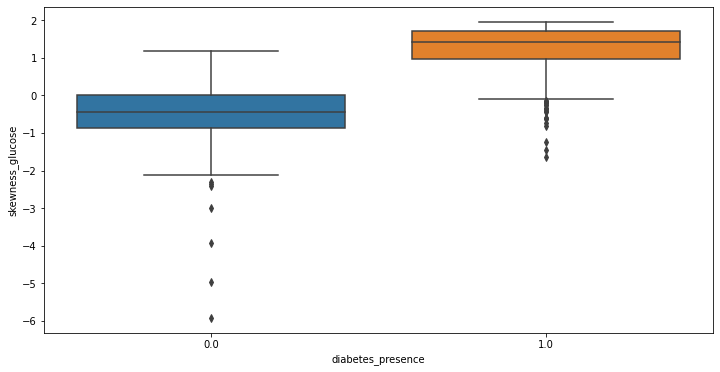

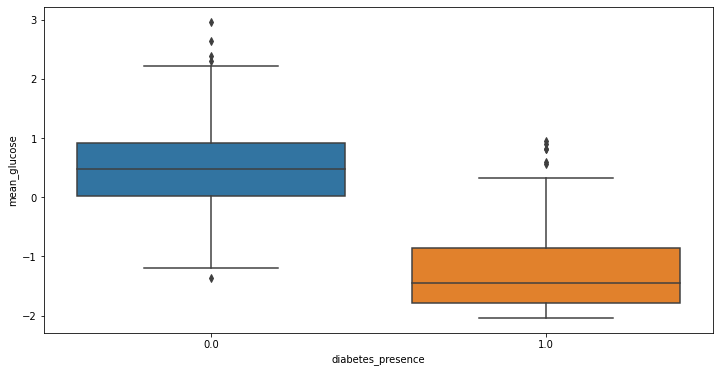

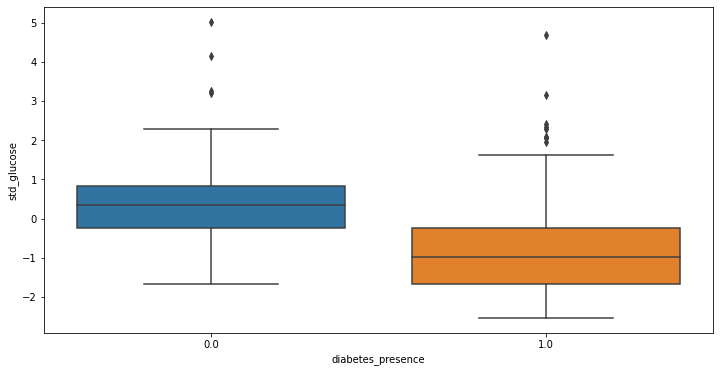

In [4]:
columns = ["kurtosis_oxygen", "skewness_oxygen", "mean_oxygen", "std_oxygen",
           "kurtosis_glucose", "skewness_glucose", "mean_glucose", "std_glucose"]

for col in columns:
    fig_01 = plt.subplots(figsize = (12, 6))
    sns.boxplot(y = col, x = "diabetes_presence", data = valid_data)

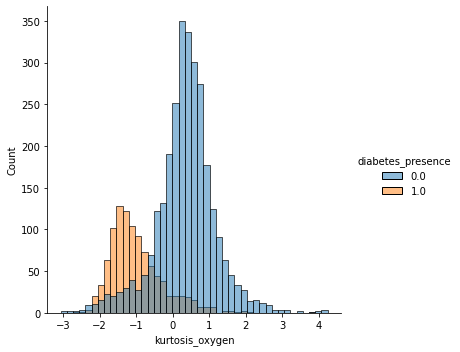

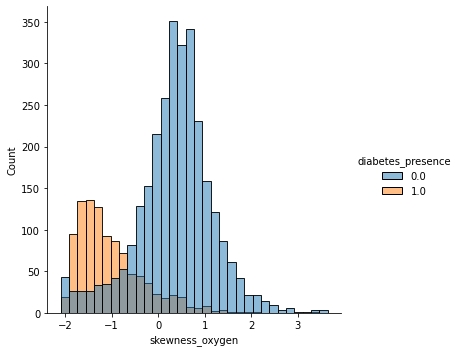

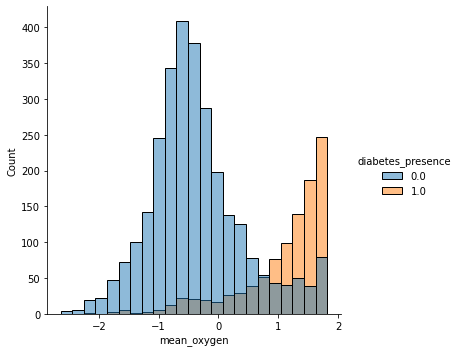

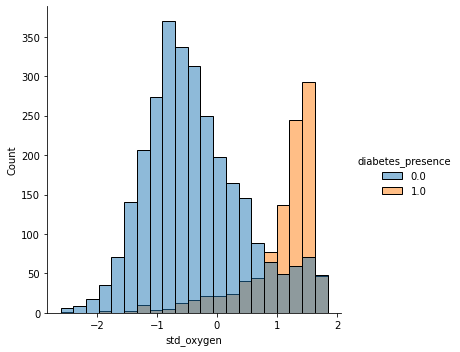

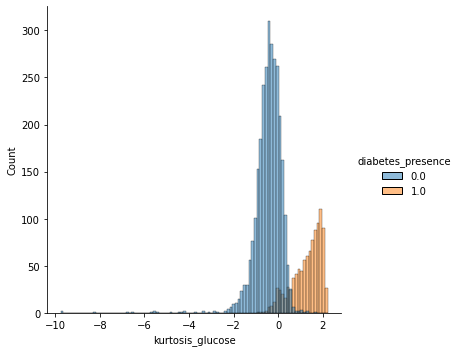

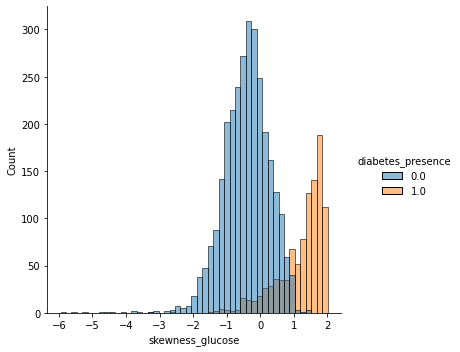

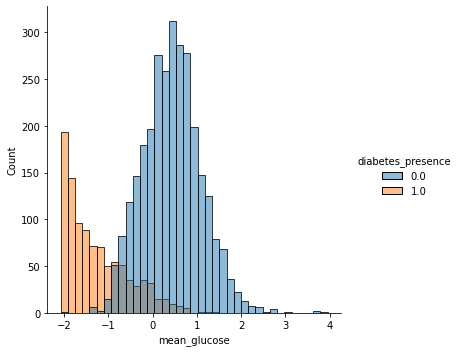

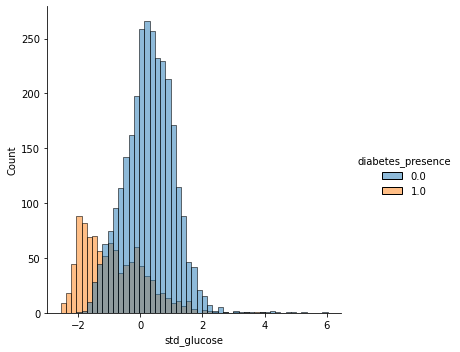

In [5]:
for col in columns:
    sns.displot(x = col, hue = "diabetes_presence", data = train_data)

In [6]:
import operator

rules_01 = [ [(("skewness_oxygen", -0.75), operator.lt)],
          [(("kurtosis_glucose",  0.6), operator.gt)],
          [(("skewness_glucose", -0.2), operator.gt)],
          [(("mean_glucose", -0.95), operator.lt)],
          [(("skewness_glucose", 0.7), operator.gt), (("kurtosis_glucose", 0.7), operator.gt)]]

rules_02 = [ [(("kurtosis_oxygen", -0.5), operator.lt)],
          [(("skewness_glucose", 0.), operator.gt), (("kurtosis_glucose", 0.5), operator.gt)],
          [(("mean_glucose", 1.), operator.lt)],
          [(("mean_glucose", -1.), operator.lt)],
          [(("skewness_oxygen", -0.25), operator.lt), (("kurtosis_glucose", 0.5), operator.gt)]]


### Opis fungovania rozhodovacieho stromu

Následne sme vytvorili náš vlastný rozhodovací strom. Ako parametre sme mu poskytli trénovací dataset a súbor pravidiel.
Tie sú uložené v zozname, v ktorom je každé pravidlo reprezentované jedným elementom. Jednotlivé pravidlá sú taktiež
reprezentované zoznamom. Ten obsahuje atribúty, spolu s číselnou hodnotou, pomocou ktorých budeme dáta v strome rozdeľovať.
Okrem toho musí obsahovať aj operátor >, alebo <, aby sme vedeli dáta správne porovnať. Tie sú reprezentované pomocou
knižnice operator.

Jednotlivé vrcholy v strome sú vytvorené manuálne vo funkcií create_tree(). Pri tvorení nového vrcholu, ako parametre
posúvame aktuálny dataset, pravidlo (rule), podľa ktorého budeme dataset rozdeľovať a ak sa jedná o listy, tak aj
zdravotný stav pacienta (condition). V tom prípade nebude nutné dataset už daľej rozdeľovať. Ale ak aktuálny vrchol ešte
nie je list, tak sa spúšťa funkcia split_dataset(), v ktorej podľa aktuálneho pravidla určíme, ktorá časť dát pôjde do
ľavej a ktorá do pravej vetvy stromu. V našom prípade idú do ľava tie dáta, ktoré spĺňajú podmienky pravidla, do pravej
tie, čo nespĺňajú.

Po vytvorení stromu vo funkcií assign_diabetes_presence() prechádzame celým stromom, až k listom, kde výsledným dátam
priradíme hodnotu 1, ak predpokladáme, že sú chorí a 0 ak majú byť zdraví. Nami ohodnotené dáta ukladáme do premennej
categorized_data, čo je vlastne nový Pandas data frame. Ten budeme porovnávať s originálnym datasetom, vďaka čomu budeme
môcť zistiť aké  hodnoty nadobúdajú TP, TN, FP a FN. Podľa nich vyrátame ostatné metriky a následne môžeme náš
rozhodovací strom vyhodnotiť.

In [7]:
class Node:
    def __init__(self, data, rule, condition = None):
        self.data = data
        self.condition = condition
        self.left = None
        self.right = None
        
        if condition is None:
            self.l_data, self.r_data = self.split_dataset(rule)
        else:
            self.l_data = None
            self.r_data = None
            

    def split_dataset(self, rule):
        l_data = None

        if len(rule) == 1:
            if rule[0][1] == operator.lt:
                l_data = self.data[self.data[rule[0][0][0]] < rule[0][0][1]]
            else:
                l_data = self.data[self.data[rule[0][0][0]] > rule[0][0][1]]

        elif len(rule) == 2:
            if rule[0][1] == operator.lt and rule[1][1] == operator.lt:
                l_data = self.data[(self.data[rule[0][0][0]] < rule[0][0][1]) & (self.data[rule[1][0][0]] < rule[1][0][1])]

            if rule[0][1] == operator.gt and rule[1][1] == operator.gt:
                l_data = self.data[(self.data[rule[0][0][0]] > rule[0][0][1]) & (self.data[rule[1][0][0]] > rule[1][0][1])]

            if rule[0][1] == operator.lt and rule[1][1] == operator.gt:
                l_data = self.data[(self.data[rule[0][0][0]] < rule[0][0][1]) & (self.data[rule[1][0][0]] > rule[1][0][1])]

            if rule[0][1] == operator.gt and rule[1][1] == operator.lt:
                l_data = self.data[(self.data[rule[0][0][0]] > rule[0][0][1]) & (self.data[rule[1][0][0]] < rule[1][0][1])]
                
        r_data = pd.concat([self.data, l_data]).drop_duplicates(keep = False)
        return l_data, r_data


In [8]:
class Tree:
    def __init__(self, data, rules):
        self.data = data
        self.rules = rules
        self.categorized_data = pd.DataFrame(columns = self.data.columns)
        self.root = Node(self.data, self.rules[0])

        # binary classifiers
        self.tp = 0
        self.tn = 0
        self.fp = 0
        self.fn = 0


    def create_tree(self, root):
        # left branch
        root.left = Node(root.l_data, self.rules[2])
        root.left.left = Node(root.left.l_data, self.rules[1])
        root.left.right = Node(root.left.r_data, [], False)
        root.left.left.left = Node(root.left.left.l_data, [], True)
        root.left.left.right = Node(root.left.left.r_data, [], False)

        # right branch
        root.right = Node(root.r_data, self.rules[4])
        root.right.left = Node(root.right.l_data, [], True)
        root.right.right = Node(root.right.r_data, self.rules[3])
        root.right.right.left = Node(root.right.right.l_data, [], True)
        root.right.right.right = Node(root.right.right.r_data, [], False)


    def assign_diabetes_presence(self, curr):
        
        if curr.left is None:
            to_add = curr.data.copy()
            if curr.condition == True:
                to_add["diabetes_presence"] = 1
            else:
                to_add["diabetes_presence"] = 0
            self.categorized_data = pd.concat([self.categorized_data, to_add])
            return

        if curr.right is None:
            to_add = curr.data.copy()
            if curr.condition == True:
                to_add["diabetes_presence"] = 1
            else:
                to_add["diabetes_presence"] = 0
            self.categorized_data = pd.concat([self.categorized_data, to_add])
            return

        self.assign_diabetes_presence(curr.left)
        self.assign_diabetes_presence(curr.right)


    def get_binary_classification(self, row):
        
        to_compare = self.categorized_data.loc[self.categorized_data.index.values == row.name]

        if to_compare["diabetes_presence"].values == 1 and row["diabetes_presence"] == 1:
            self.tp += 1
        if to_compare["diabetes_presence"].values == 0 and row["diabetes_presence"] == 0:
            self.tn += 1
        if to_compare["diabetes_presence"].values == 1 and row["diabetes_presence"] == 0:
            self.fp += 1
        if to_compare["diabetes_presence"].values == 0 and row["diabetes_presence"] == 1:
            self.fn += 1


    def calculate_accuracy(self):
        return (self.tp + self.tn) / len(self.data)

    def calculate_precision(self):
        return self.tp / (self.tp + self.fp)

    def calculate_recall(self):
        return self.tp / (self.tp + self.fn)

    def calculate_f1_score(self):
        p = self.calculate_precision()
        r = self.calculate_recall()
        return (2 * p * r) / (p + r)


    def print_metrics(self):
        
        self.data.apply(lambda x: self.get_binary_classification(x), axis = 1)
        
        print("Number of rows: ", len(self.data))
        print("True positive: ", self.tp)
        print("True negative: ", self.tn)
        print("False positive: ", self.fp)
        print("False negative: ", self.fn)
        
        print("\nAccuracy: ", self.calculate_accuracy())
        print("Precision: ", self.calculate_precision())
        print("Recall: ", self.calculate_recall())
        print("F1 score: ", self.calculate_f1_score())
        

### Vyhodnotenie pravidiel

Nižšie môžeme vidieť vyhodnotenia našich stromov. Použili sme testovacie a taktiež aj validačné dáta, aby sme ukázali,
že pravidlá fungujú približne rovnako pri oboch datasetoch. Okrem toho sme použili oba zoznamy pravidiel. V testovacích
dátach boli vyhodnotenia takmer identické. Celkovo bolo správne označených približne 95% dát a až 97% záznamov, u ktorých
sme predpokladali výskyt cukrovky bolo taktiež označených správne. Presnosť oboch súborov pravidiel trochu klesla pri
validačných dátach, kde nadobudla hodnotu okolo 95%.

Stromy pri ktorých sme použili testovacie dáta mali hodnotu pokrytia približne 83%, čiže sa nám nepodarilo idenifikovať
cukrovku u 27% pacientov, ktorí ju skutočne mali. Vo validačných dátach sme sa dopracovali k priaznivejším výsledkom,
kde pokrytie nadobudlo hodnotu 85% pre prvý set pravidiel a 86% pre druhý. Túto hodnotu ovplyvnil menší počet chýb druhého
typu. Pri testovacích datasetoch sme dosiahli F1 skóre 89% a pri validačných až 90%. Pri porovnávani s ostatnými
rozhodovacími stromami, vytvorenými pomocou scikit-learn sme sa rozhodli použiť strom, ktorý klasifikuje dáta pomocou
prvého súboru pravidiel, keďže väčšina metrík mala práve tu priaznivejšiu hodnotu ako v druhom strome.

In [9]:
my_tree_1 = Tree(train_data, rules_01)
my_tree_1.create_tree(my_tree_1.root)
my_tree_1.assign_diabetes_presence(my_tree_1.root)
my_tree_1.print_metrics()

Number of rows:  3924
True positive:  831
True negative:  2894
False positive:  26
False negative:  173

Accuracy:  0.9492864424057085
Precision:  0.969661610268378
Recall:  0.8276892430278885
F1 score:  0.893068242880172


In [10]:
my_tree_2 = Tree(train_data, rules_02)
my_tree_2.create_tree(my_tree_2.root)
my_tree_2.assign_diabetes_presence(my_tree_2.root)
my_tree_2.print_metrics()

Number of rows:  3924
True positive:  832
True negative:  2894
False positive:  26
False negative:  172

Accuracy:  0.9495412844036697
Precision:  0.9696969696969697
Recall:  0.8286852589641435
F1 score:  0.8936627282491943


In [11]:
my_tree_v1 = Tree(valid_data, rules_01)
my_tree_v1.create_tree(my_tree_v1.root)
my_tree_v1.assign_diabetes_presence(my_tree_v1.root)
my_tree_v1.print_metrics()

Number of rows:  1306
True positive:  299
True negative:  943
False positive:  17
False negative:  47

Accuracy:  0.9509954058192955
Precision:  0.9462025316455697
Recall:  0.8641618497109826
F1 score:  0.9033232628398791


In [12]:
my_tree_v2 = Tree(valid_data, rules_02)
my_tree_v2.create_tree(my_tree_v2.root)
my_tree_v2.assign_diabetes_presence(my_tree_v2.root)
my_tree_v2.print_metrics()

Number of rows:  1306
True positive:  296
True negative:  945
False positive:  15
False negative:  50

Accuracy:  0.9502297090352221
Precision:  0.9517684887459807
Recall:  0.8554913294797688
F1 score:  0.9010654490106546


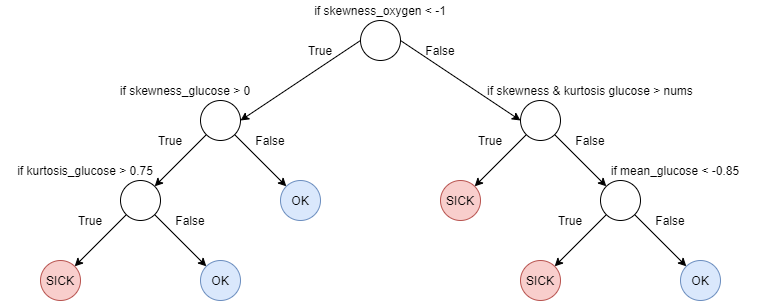

In [13]:
from IPython.display import Image
Image("images/xd.png")

Na obrázku môžeme vidieť náčrt nášho manuálne vytvoreného rozhodovacieho stromu. V tomto prípade bol použitý prvý set
pravidiel.

# Reálne stromy, trénovanie

In [14]:
train_data

,age,sex,kurtosis_oxygen,pregnant,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,final_weight,diabetes_presence,std_glucose,mean_oxygen,hours-per-week,capital-loss
0,64.0,0.0,-0.247785,0.0,-0.044795,0.966599,-0.741347,0.482709,0.0,-0.273095,0.895564,124076.0,1.0,-0.903880,0.315574,40.0,0.0
1,45.0,1.0,1.053704,0.0,-0.044795,-0.980163,0.487484,-0.949389,0.0,1.059518,-0.562561,383365.0,0.0,0.752521,-1.022556,70.0,0.0
2,42.0,1.0,-0.558023,0.0,-0.068336,-0.256712,0.176430,0.482185,0.0,-0.569871,-0.147686,272913.0,0.0,0.333066,0.513521,30.0,0.0
3,61.0,0.0,-1.170262,0.0,-0.058305,0.899044,-0.966489,1.389073,0.0,-1.254598,1.039322,509048.0,1.0,-0.352131,1.332811,37.0,0.0
4,57.0,1.0,0.677641,0.0,-0.041398,-0.794815,0.169169,-0.976165,0.0,0.774450,-0.832922,368797.0,0.0,0.898301,-0.743272,60.0,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,62.0,1.0,-1.275206,0.0,-0.044795,1.755165,-1.729280,1.484663,0.0,-1.356073,1.794529,46094.0,1.0,-1.903066,1.474278,33.0,0.0
3920,60.0,0.0,2.528143,0.0,-0.044795,-0.628922,0.021402,-1.894191,0.0,2.301458,-0.506712,35378.0,0.0,0.630336,-2.078312,45.0,0.0
3921,60.0,1.0,0.733397,0.0,-0.058305,-0.623782,0.938440,-1.027755,0.0,0.797377,-0.527208,22418.0,0.0,0.359200,-0.953727,40.0,0.0
3922,42.0,1.0,0.742787,0.0,-0.054940,-0.369599,0.022809,-0.467416,0.0,0.714641,-0.527812,277695.0,0.0,0.431564,-0.534153,36.0,0.0


In [15]:
train_data_without_diabetes = train_data.drop(columns=["diabetes_presence"])

In [16]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(train_data_without_diabetes, train_data["diabetes_presence"])

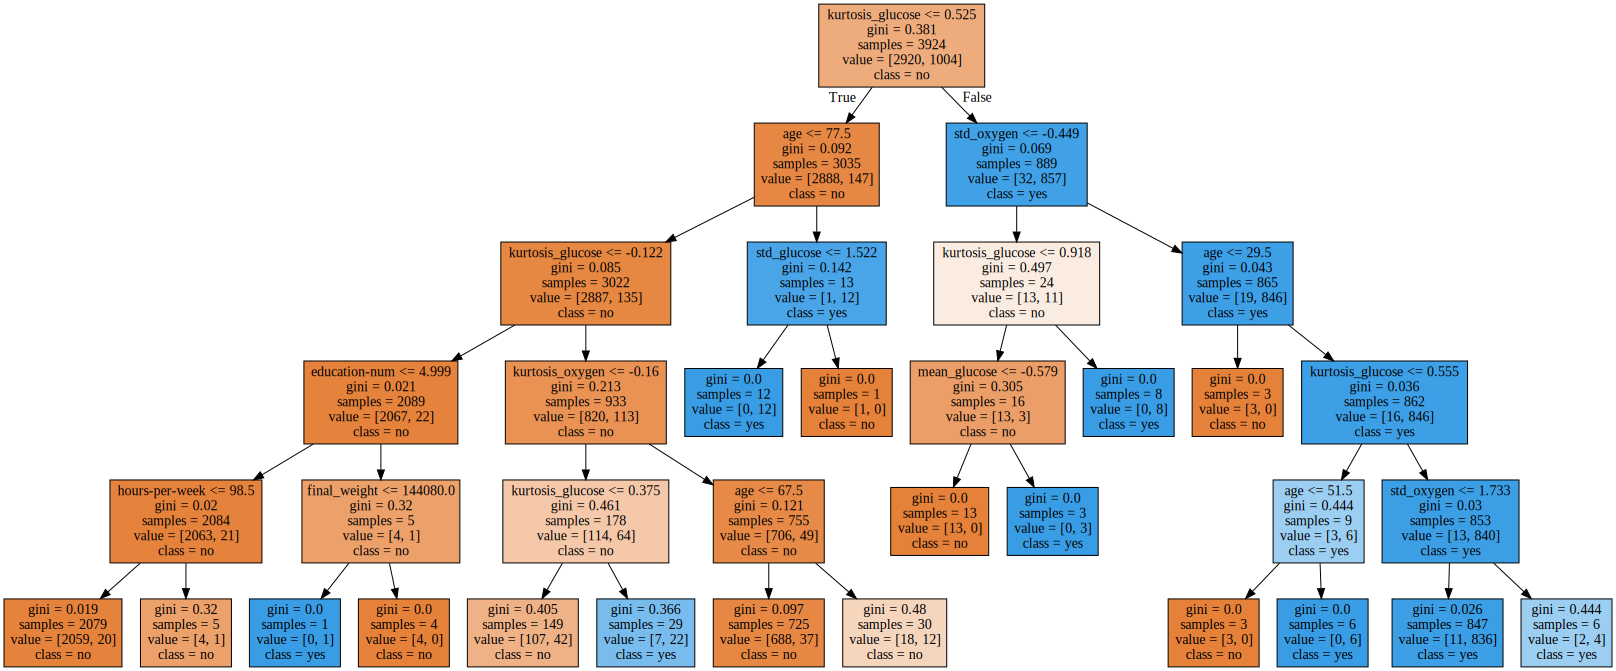

In [17]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(model, 
                               out_file=None,
                               feature_names=train_data_without_diabetes.columns,
                               class_names=['no', 'yes'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML
style = "<style>svg{width:40% !important;height:80% !important;}</style>"
HTML(style)

In [18]:
train_data_tree = model.predict(train_data_without_diabetes)

In [19]:
train_diabetes_original = train_data["diabetes_presence"]

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(accuracy_score(train_data_tree, train_diabetes_original))
print(precision_score(train_data_tree, train_diabetes_original))
print(recall_score(train_data_tree, train_diabetes_original))

0.9663608562691132
0.8884462151394422
0.9780701754385965


In [21]:
valid_data_without_diabetes = valid_data.drop(columns=["diabetes_presence"])
valid_data_diabetes = valid_data["diabetes_presence"]

In [22]:
valid_data_tree=model.predict(valid_data_without_diabetes)

In [23]:
print(accuracy_score(valid_data_tree, valid_data_diabetes))
print(precision_score(valid_data_tree, valid_data_diabetes))
print(recall_score(valid_data_tree, valid_data_diabetes))

0.9640122511485452
0.9248554913294798
0.9384164222873901


# hyperparameter tuning

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

In [25]:
def plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, title):
    plt.title(title)
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.95, 1.001)
    lw = 2
    plt.semilogx(param_range, 
                 train_scores_mean, 
                 label="Training score",
                 color="darkorange", 
                 lw=lw
                )
    plt.fill_between(param_range, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.2,
                     color="darkorange", 
                     lw=lw
                    )
    plt.semilogx(param_range, 
                 test_scores_mean, 
                 label="Cross-validation score",
                 color="navy", 
                 lw=lw
                )
    plt.fill_between(param_range, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.2,
                     color="navy", 
                     lw=lw
                    )
    plt.legend(loc="best")    
    return

In [26]:
print(len(train_data), len(valid_data))

x_train, y_train = train_data.loc[:, train_data.columns != 'diabetes_presence'], train_data['diabetes_presence']
x_valid, y_valid = valid_data.loc[:, valid_data.columns != 'diabetes_presence'], valid_data['diabetes_presence']

3924 1306


In [27]:
param_range =   [1,5,10,20,30,40,50,100,1000] #[100, 300, 500, 750, 800, 1200]


train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X = x_train, 
                                             y = y_train, 
                                             param_name = 'max_depth', 
                                             param_range = param_range, 
                                             scoring="accuracy",
                                             cv = 3
                                            )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# print(train_scores)
# print(test_scores)

mid_values = [row[1] for row in test_scores]

# Zistenie Max a Min values pre testovanie vysledkov cross-validovania
MAX_DEPTH = {
    'max': param_range[mid_values.index(max(mid_values))],
    'min': param_range[mid_values.index(min(mid_values))]
}

print(MAX_DEPTH)

{'max': 10, 'min': 1}


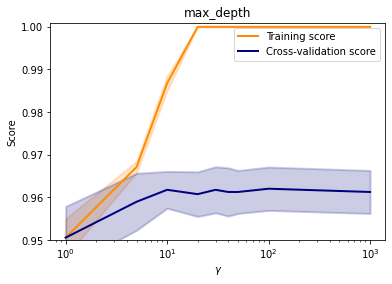

In [28]:
plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth")

In [29]:
param_range =   [1,5,10,20,30,40,50,100,2000] #[100, 300, 500, 750, 800, 1200]


train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X = x_train, 
                                             y = y_train, 
                                             param_name = 'n_estimators', 
                                             param_range = param_range, 
                                             scoring="accuracy",
                                             cv = 3
                                            )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# print(train_scores)
# print(test_scores)

mid_values = [row[1] for row in test_scores]

# Zistenie Max a Min values pre testovanie vysledkov cross-validovania
N_ESTIMATORS = {
    'max': param_range[mid_values.index(max(mid_values))],
    'min': param_range[mid_values.index(min(mid_values))]
}

print(N_ESTIMATORS)

{'max': 20, 'min': 1}


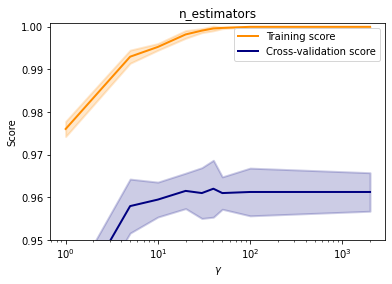

In [30]:
plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,"n_estimators")

In [31]:
param_range =  [2,5,10,20,30,40,50,100,1000]  #[100, 300, 500, 750, 800, 1200]


train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X = x_train, 
                                             y = y_train, 
                                             param_name = 'min_samples_split', 
                                             param_range = param_range, 
                                             scoring="accuracy",
                                             cv = 3
                                            )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# print(train_scores)
# print(test_scores)
mid_values = [row[1] for row in test_scores]

# Zistenie Max a Min values pre testovanie vysledkov cross-validovania
MIN_SAMPLES_SPLIT = {
    'max': param_range[mid_values.index(max(mid_values))],
    'min': param_range[mid_values.index(min(mid_values))]
}

print(MIN_SAMPLES_SPLIT)

{'max': 2, 'min': 1000}


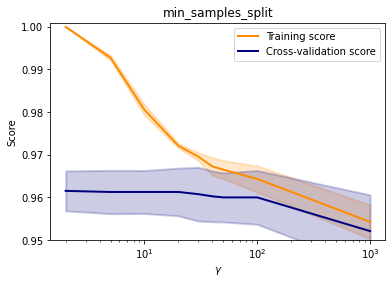

In [32]:
plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split")

In [33]:
param_range =  [1,5,10,20,30,40,50,100,1000]  #[100, 300, 500, 750, 800, 1200]


train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X = x_train, 
                                             y = y_train, 
                                             param_name = 'min_samples_leaf', 
                                             param_range = param_range, 
                                             scoring="accuracy",
                                             cv = 3
                                            )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# print(train_scores)
# print(test_scores)

mid_values = [row[1] for row in test_scores]

# Zistenie Max a Min values pre testovanie vysledkov cross-validovania
MIN_SAMPLES_LEAF = {
    'max': param_range[mid_values.index(max(mid_values))],
    'min': param_range[mid_values.index(min(mid_values))]
}

print(MIN_SAMPLES_LEAF)

{'max': 1, 'min': 1000}


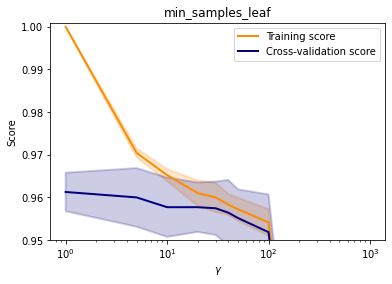

In [34]:
plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,"min_samples_leaf")

In [35]:
param_range =  [1,5,10,20,30,40,50,100,1000]  #[100, 300, 500, 750, 800, 1200]


train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             X = x_train, 
                                             y = y_train, 
                                             param_name = 'random_state', 
                                             param_range = param_range, 
                                             scoring="accuracy",
                                             cv = 3
                                            )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# print(train_scores)
# print(test_scores)

mid_values = [row[1] for row in test_scores]

# Zistenie Max a Min values pre testovanie vysledkov cross-validovania
RANDOM_STATE = {
    'max': param_range[mid_values.index(max(mid_values))],
    'min': param_range[mid_values.index(min(mid_values))]
}

print(RANDOM_STATE)

{'max': 1000, 'min': 40}


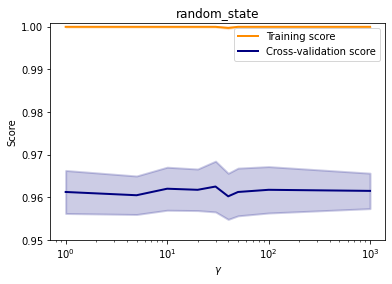

In [36]:
plot_valid_curve(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std,"random_state")

In [37]:
def ForestClassifierTest(type, X_train, y_train, X_valid, y_valid):
    # Testovanie maximalnych hodnot 
    forest = RandomForestClassifier(random_state = RANDOM_STATE[type],
                                  n_estimators = N_ESTIMATORS[type],
                                  max_depth = MAX_DEPTH[type], 
                                  min_samples_split = MIN_SAMPLES_SPLIT[type],  
                                min_samples_leaf = MIN_SAMPLES_LEAF[type]
                               ) 


    hyper_model = forest.fit(X_train, y_train)
    y_pred = hyper_model.predict(X_valid)

    return accuracy_score(y_valid, y_pred)

In [38]:
ForestClassifierTest('max', x_train, y_train, x_valid, y_valid)

0.9632465543644717

In [39]:
ForestClassifierTest('min', x_train, y_train, x_valid, y_valid)

0.8078101071975498

# Vyhodnotenie vplyvu zvolenej stratégie riešenia na správnosť klasifikácie

In [40]:
train_data_2 = preprocessing.preprocess_dataset(medical_train, personal_train, 2)
valid_data_2 = preprocessing.preprocess_dataset(medical_valid, personal_valid, 2)

d:\programming\python\iau_projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Programming\Python\IAU_projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Programming\Python\IAU_projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0


In [41]:
X_train_2 = train_data_2.drop(columns=["diabetes_presence"])
y_train_2 = train_data_2["diabetes_presence"]
model2 = DecisionTreeClassifier(max_depth=5)
model2 = model2.fit(X_train_2, y_train_2)

train_2_predict = model2.predict(X_train_2)

In [42]:
print(accuracy_score(train_2_predict, y_train_2))
print(precision_score(train_2_predict, y_train_2))
print(recall_score(train_2_predict, y_train_2))

0.9663608562691132
0.8884462151394422
0.9780701754385965


In [43]:
x_train_2, y_train_2 = train_data_2.loc[:, train_data_2.columns != 'diabetes_presence'], train_data_2['diabetes_presence']
x_valid_2, y_valid_2 = valid_data_2.loc[:, valid_data_2.columns != 'diabetes_presence'], valid_data_2['diabetes_presence']

In [44]:
# Vypocitanie vysledokov z druheho typu preprocesingu s vypocitanymi hyperparametrami
data_max_1 = ForestClassifierTest('max', x_train, y_train, x_valid, y_valid)
data_max_2 = ForestClassifierTest('max', x_train_2, y_train_2, x_valid_2, y_valid_2)

print(f'Prvy preprocessing {data_max_1}')
print(f'Druhy preprocessing {data_max_2}')


Prvy preprocessing 0.9632465543644717
Druhy preprocessing 0.9617151607963247


In [45]:
# Vypocitanie vysledokov z druheho typu preprocesingu s vypocitanymi hyperparametrami
data_min_1 = ForestClassifierTest('min', x_train, y_train, x_valid, y_valid)
data_min_2 = ForestClassifierTest('min', x_train_2, y_train_2, x_valid_2, y_valid_2)

print(f'Prvy preprocessing {data_min_1}')
print(f'Druhy preprocessing {data_min_2}')


Prvy preprocessing 0.8078101071975498
Druhy preprocessing 0.8101071975497703
